https://www.youtube.com/watch?v=dEI6j7rbdYk

In [2]:
import pandas as pd 

In [19]:
df = pd.read_csv('conso-quotidienne.csv',sep=';')
df = df[df['region']=='Hauts-de-France']
df = df.dropna(subset='consommation_brute_totale')
df = df[['date','consommation_brute_totale']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)  # Définir la colonne 'date' comme index
df = df.resample('D').mean() 

In [20]:
df.describe(include='all')

,consommation_brute_totale
count,3772.000000
mean,13434.234241
std,4546.092271
min,6084.416667
25%,9586.385417
50%,12437.208333
75%,17048.354167
max,27201.083333


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3833 entries, 2013-01-01 to 2023-06-30
Freq: D
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   consommation_brute_totale  3772 non-null   float64
dtypes: float64(1)
memory usage: 59.9 KB


<AxesSubplot: xlabel='date'>

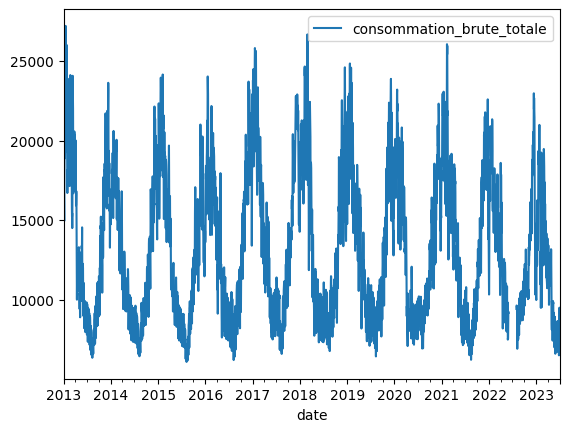

In [22]:
df.plot()

In [23]:
df.loc['2016']

,consommation_brute_totale
date,
2016-01-01,13615.125000
2016-01-02,13819.791667
2016-01-03,14362.125000
2016-01-04,17114.916667
2016-01-05,17928.208333
...,...
2016-12-27,19483.958333
2016-12-28,21067.500000
2016-12-29,22206.458333


<AxesSubplot: xlabel='date'>

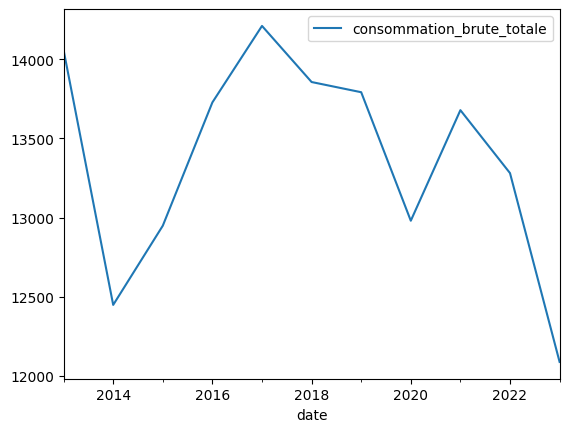

In [24]:
df.resample('Y').mean().plot()

<AxesSubplot: xlabel='date'>

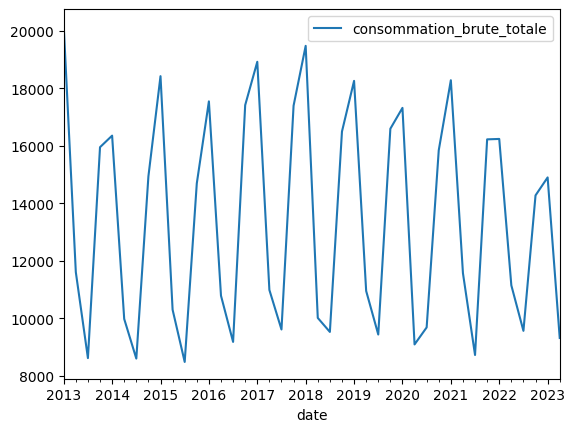

In [25]:
df.resample('Q').mean().plot()

<AxesSubplot: xlabel='date'>

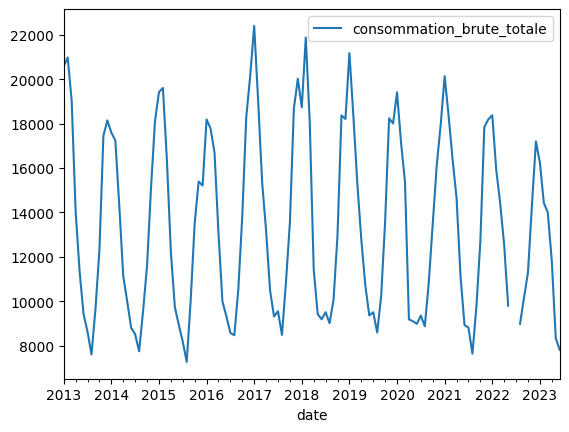

In [26]:
df.resample('M').mean().plot()

<AxesSubplot: xlabel='date'>

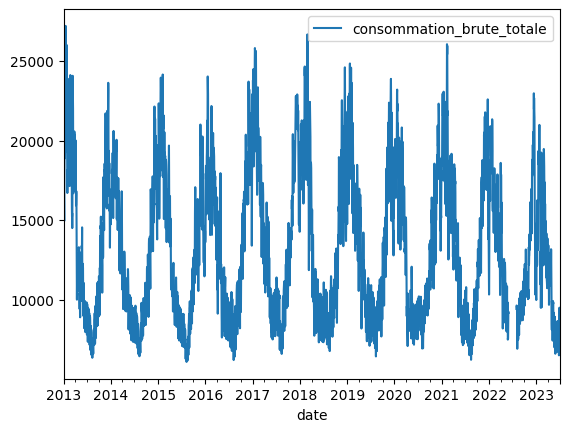

In [27]:
df.resample('D').mean().plot()

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
df['consommation_brute_totale'].fillna(df['consommation_brute_totale'].mean(), inplace=True)

decompose_result_mult = seasonal_decompose(df['consommation_brute_totale'],model='multiplicative')

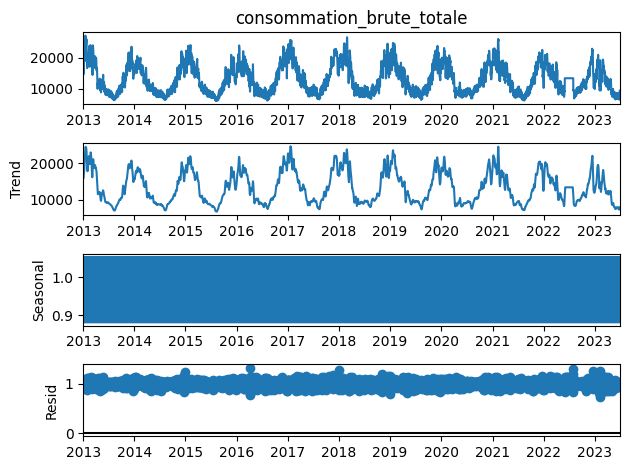

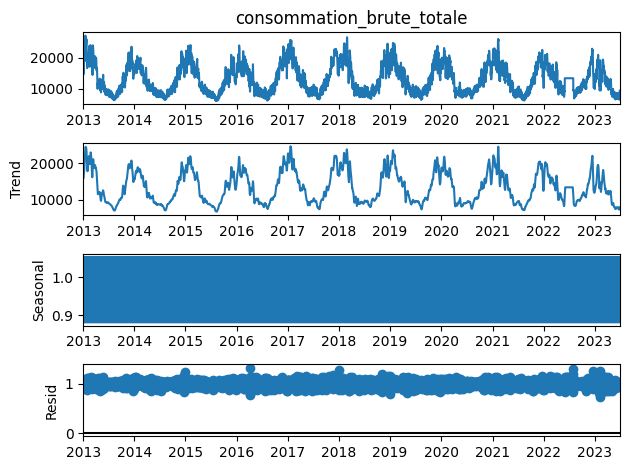

In [38]:
tendance = decompose_result_mult.trend
saisonnalite = decompose_result_mult.seasonal
residus = decompose_result_mult.resid
decompose_result_mult.plot()

<AxesSubplot: xlabel='date'>

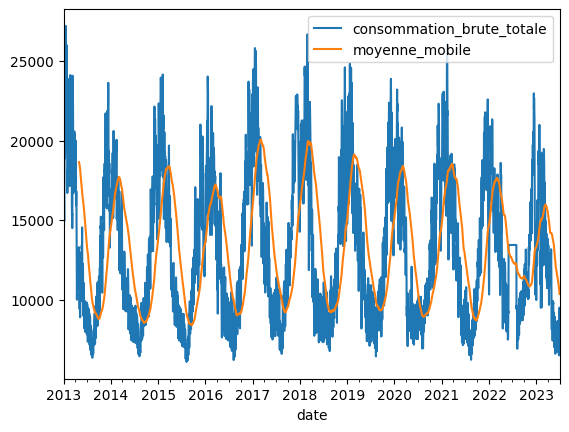

In [50]:
df['moyenne_mobile'] = df['consommation_brute_totale'].rolling(window=120).mean()

df.resample('D').mean().plot()

In [45]:
df

,consommation_brute_totale,moyenne_mobile
date,,
2013-01-01,14582.722222,NaN
2013-01-02,16761.500000,NaN
2013-01-03,16612.208333,NaN
2013-01-04,16548.750000,NaN
2013-01-05,15612.541667,NaN
...,...,...
2023-06-26,7671.541667,7322.702381
2023-06-27,7805.875000,7307.339286
2023-06-28,9030.708333,7515.202381
